# Convert the block format I have to a per-event friendly format

In [4]:
import numpy as np

In [5]:
#grab the datasets
#hits
hits=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHz/hits_eval.npy')
hitparams=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHz/params_eval.npy')
#charge
charge=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHz/charge_eval.npy')

ids=[]
for i in range(1,len(hitparams)):
    if all(hitparams[i-1]!=hitparams[i]):
        ids.append(i)
ids.append(len(hits))

#create events 
start=0
iteration=0
events=[]
for i in ids:
    event={
        "hits":  hits[start:i],
        "total_charge": charge[iteration],
        "truth": hitparams[start]     
    }
    start=i
    events.append(event)
    iteration+=1


In [34]:
one=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHz/hits_eval.npy')
two=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHz/params_eval.npy')


events[1]['truth']
len(events[1]['hits'])
print(two[0:40])

[[-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+00
   1.79378552e+00 -5.06438060e+00  6.03444290e+00]
 [-4.06302250e+03 -4.71325301e+03 -2.32947822e+03  1.41666566e+0

In [11]:
#lets filter the data by >10 pmts

q=[event for event in events if len(event['hits']) > 10]
print(len(q))
len(q[1]['hits'])

358086


19

In [81]:
#grab the neural network formatted datasets
#hits
hits=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHzhits.npy')
hitparams=np.load('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/3kHzparams.npy')
#charge
print('loaded')
ids=[]
for i in range(1,len(hitparams)):
    if all(hitparams[i-1]!=hitparams[i]):
        ids.append(i)
ids.append(len(hits))

#create events 
start=0
iteration=0
events=[]
for i in ids:
    event={
        "hits":  hits[start:i],
        "total_charge": np.array([np.sum(hits[start:i,4]),len(hits[start:i])]),
        "truth": hitparams[start]
        
    }
    start=i
    events.append(event)
    iteration+=1


loaded


In [84]:
print(len(events))

#events=[event for event in events if len(event['hits']) > 15]

prm=[]
hit=[]
chg=[]
cprm=[]
print(len(events))
for event in events:
    for i in range(0,len(event['hits'])):
        hit.append(event['hits'][i])
        prm.append(event['truth'])
    chg.append(event['total_charge'])
    cprm.append(event['truth'])



4073349
2078389


In [85]:
print(len(prm))
np.save('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/thits.npy',np.array(hit))
np.save('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/tparams.npy',np.array(prm))
np.save('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/tcparams.npy',np.array(cprm))
np.save('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/tcharge.npy',np.array(chg))
print(len(chg))

44825851
2078389


In [83]:
np.save('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/tcparams.npy',np.array(cprm))
np.save('/home/gmw5164/testbench/utilInstall/WMUtils/sibyl/noisedata/tcharge.npy',np.array(chg))

In [6]:
events=[event for event in events if len(event['hits']) > 15]

In [187]:
#Testing the n9 function
event=4

def get_n9(event):
    index=np.argsort(event['hits'][:,3])
    event['hits']=event['hits'][index]#sort the pmts by time hit to make searching easier
#    print(event['hits'][:,3])
    window=[0,0,0]
    for i in range(0,len(event['hits'])):
        for j in range(i+4,len(event['hits'])):
            if event['hits'][j,3]-event['hits'][i,3]<9 and window[2]<j-i:
                if j-i>window[1]-window[0]:
                    window=[i,j,j-i]
    return window

print(events[event]['hits'][:,3])
n9s=get_n9(events[event])
print(n9s)
[[][][][][][][][]]

[-9.0178494  74.16781365 18.84439944 -7.60911043 -5.87314734  0.
 -0.77574061 57.90146941 -4.54312865]
[0, 4, 4]


[23722 28104 29238 27820 26070 35687 14024  7727  4119  2308  1306   729
   403   235   104    66    32    16     4     5]
[ 3.999  4.999  5.999  6.999  7.999  8.999  9.999 10.999 11.999 12.999
 13.999 14.999 15.999 16.999 17.999 18.999 19.999 20.999 21.999 22.999
 23.999]


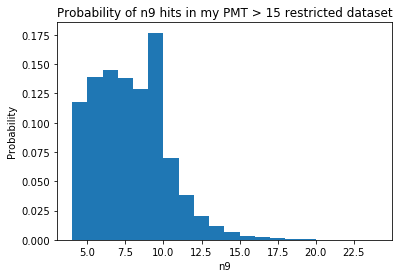

In [34]:
from matplotlib import pyplot as plt 
n9_array=np.array([n9[2] for n9 in n9s])
bins=[i-0.001 for i in range(4,np.max(n9_array))]
hist,bins = np.histogram(n9_array,bins) 
plt.figure(facecolor='white')
plt.hist(n9_array,bins,density=True)
plt.title('Probability of n9 hits in my PMT > 15 restricted dataset')
plt.xlabel('n9')
plt.ylabel('Probability')
print(hist)
print(bins)

In [62]:
event=1
t=events[event]['truth']
t[[0:2,5]]

SyntaxError: invalid syntax (<ipython-input-62-63a2a441a89f>, line 3)

In [204]:
from scipy.optimize import least_squares


def get_residuals(x,event):
    #input vector x corresponds to [x,y,z,t]
    residuals=[]
    c=299792458*10**-6
    n=1.333
    #takes an event hit and calculates residuals
    for i in range (0,len(event['hits'])-2):
        hit=event['hits'][i]
        residuals.append((c/n)**2*(x[3]-hit[3])**2 - (x[0]-hit[0])**2 - (x[1]-hit[1])**2 - (x[2]-hit[2])**2)
    return np.array(residuals)

event=6
truth=events[event]['truth'][[0,1,2,5]]
#truth=np.array([0,0,0,0,0])
get_residuals(truth,events[event])

bound=([-6700,-6700,-6700,-400],[6700,6700,6700,400])

x0=np.array([0,0,0,0])
returned=least_squares(get_residuals,x0,args=(events[event],),bounds=bound)
print(returned['x'])

print(truth)

print((returned['x'][0]**2+returned['x'][1]**2)**0.5)
print((truth[0]**2+truth[1]**2)**0.5)

print(events[event]['hits'])
#print(events[event]['truth'])
#print(get_residuals(truth,events[event]))
#print(get_residuals(returned['x'],events[event]))

[ 5.69313121e+03  2.32269826e+03 -5.22150353e+03  1.76912509e+00]
[ 5.72101311e+03  2.82101804e+03 -6.02953334e+03 -3.72962279e+00]
6148.712888581583
6378.725087557439
[[ 6.70000000e+03  0.00000000e+00 -1.25000000e+03  2.24861992e+01
   1.38352954e+00  1.00000000e+00]
 [ 6.40233780e+03  1.97485967e+03 -4.75000000e+03  9.30538532e+00
   9.29614544e-01  1.00000000e+00]
 [ 6.53201701e+03  1.49089026e+03 -5.25000000e+03  5.45596549e+00
   1.21042931e+00  1.00000000e+00]
 [ 6.40233780e+03  1.97485967e+03 -5.25000000e+03  6.20906712e+00
   4.50786650e-01  1.00000000e+00]
 [ 6.23685412e+03  2.44778486e+03 -5.25000000e+03  1.53486571e-01
   9.43544626e-01  1.00000000e+00]
 [ 6.03649141e+03  2.90702105e+03 -5.25000000e+03  1.79582109e+00
   4.03047132e+00  1.00000000e+00]
 [ 5.80237021e+03  3.35000000e+03 -5.25000000e+03  3.24153538e+00
   2.38907647e+00  1.00000000e+00]
 [ 5.23827093e+03 -4.17738167e+03 -5.25000000e+03  3.06541880e+01
   9.64866459e-01  1.00000000e+00]
 [ 6.40233780e+03  1.974

In [162]:
#grab the datasets
#hits
hits=np.load('/fastio/wendel/hits.npy')
hitparams=np.load('/fastio/wendel/params.npy')
#charge
charge=np.load('/fastio/wendel/charge.npy')

ids=[]
for i in range(1,len(hitparams)):
    if all(hitparams[i-1]!=hitparams[i]):
        ids.append(i)
ids.append(len(hits))

#create events
start=0
iteration=0
events=[]
for i in ids:
    event={
        "hits":  hits[start:i],
        "total_charge": charge[iteration],
        "truth": hitparams[start]     
    }
    start=i
    events.append(event)
    iteration+=1

del hits
del hitparams
del charge

KeyboardInterrupt: 

In [114]:
print(len(events))
#This one will convert the standard 'human readable' dataset into a numpy set for training
#events=[event for event in events[-200000:] if len(event['hits']) > 3] #filter the last 200k events and only include event with hits >3

prm=[]
hit=[]
chg=[]
cprm=[]
print(len(events))
for event in events:
    if (event['truth'][0]**2+event['truth'][1]**2)**0.5<6700 and abs(event['truth'][2])<6700:
        for i in range(0,len(event['hits'])):
            hit.append(event['hits'][i])
            prm.append(event['truth'])
        chg.append(event['total_charge'])
        cprm.append(event['truth'])
    
print(len(chg))

198207
198207
198206


In [116]:
np.save('/fastio/wendel/test/hits.npy',np.array(hit))
np.save('/fastio/wendel/test/params.npy',np.array(prm))
np.save('/fastio/wendel/test/cparams.npy',np.array(cprm))
np.save('/fastio/wendel/test/charge.npy',np.array(chg))

[ 1.44541619e+02  2.78790012e+03  4.11572463e+03  2.80981983e-01
  5.96531219e+00 -6.98107532e+01  6.45354605e+00]
